In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


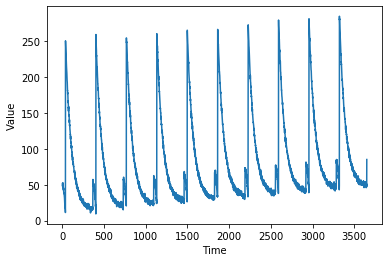

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 5 * np.pi),
                    10 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10# YOUR CODE HERE #
series = trend(time, 1)# YOUR CODE HERE#)  
baseline = 10
amplitude = 40
slope = 0.01# YOUR CODE HERE#
noise_level = 2# YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

Desired output -- a chart that looks like this:

![Chart showing upward trend and seasonailty](http://www.laurencemoroney.com/wp-content/uploads/2019/07/plot1.png)

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [7]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[window_size]),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9))
model.fit(dataset,epochs=20)



Epoch 1/20
94/94 [==============================] - 3s 32ms/step - loss: 14.6648
Epoch 2/20
94/94 [==============================] - 2s 22ms/step - loss: 7.4538
Epoch 3/20
94/94 [==============================] - 2s 21ms/step - loss: 5.2027
Epoch 4/20
94/94 [==============================] - 2s 23ms/step - loss: 4.7488
Epoch 5/20
94/94 [==============================] - 2s 22ms/step - loss: 4.1033
Epoch 6/20
94/94 [==============================] - 2s 24ms/step - loss: 4.7984
Epoch 7/20
94/94 [==============================] - 2s 24ms/step - loss: 3.9518
Epoch 8/20
94/94 [==============================] - 2s 22ms/step - loss: 4.5562
Epoch 9/20
94/94 [==============================] - 2s 22ms/step - loss: 4.8299
Epoch 10/20
94/94 [==============================] - 2s 22ms/step - loss: 4.0616
Epoch 11/20
94/94 [==============================] - 2s 24ms/step - loss: 4.3013
Epoch 12/20
94/94 [==============================] - 2s 22ms/step - loss: 5.2092
Epoch 13/20
94/94 [=================

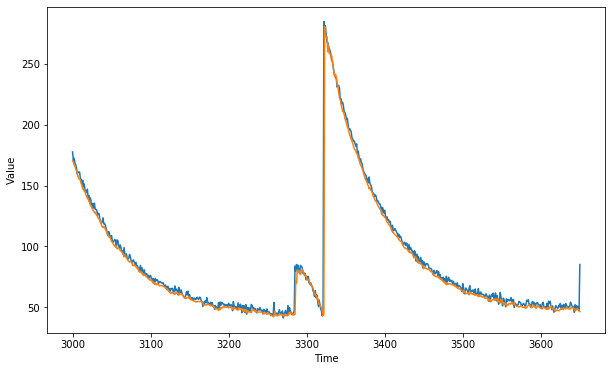

In [9]:
forecast = []
#series_pred = series[split_time-window_size:]
#print(len(series_pred))
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

#print(len(result))

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [11]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# EXPECTED OUTPUT
# A Value less than 4

3.1927924

In [8]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [9]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);

<IPython.core.display.Javascript object>